#### Simulations with positive autocorrlations

In [26]:
from utills.geodata import generate_grid_dataframes

In [27]:
# import libraries
from utills.geodata import generate_grid_dataframes

from utills.adjacency_simplex import AdjacencySimplex  # Import the class
from utills.plot_utills import plot_simplicial_complex_gif
from utills.calculate_tda_summaries import compute_persistence

In [28]:
# generate grid dataframes for counties and census tracts
county_df, census_df = generate_grid_dataframes(grid_side_length=7,county_autocorrelation="positive", census_autocorrelation="positive" , random_seed=42)

In [29]:
county_df.head(3)

,Index_county,Rate_cou,geometry
0,0,16.056498,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,1,16.371808,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"
2,2,16.780932,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))"


In [30]:
county_df['Rate_cou'].describe()

count    49.000000
mean     12.088575
std       3.667584
min       5.768420
25%       9.026877
50%      12.638648
75%      14.696894
max      19.292526
Name: Rate_cou, dtype: float64

In [31]:
census_df.head(3)

,Index_census,Rate_cen,geometry,Index_county
0,0,3.765380,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",0
1,1,3.687429,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",0
2,2,4.019538,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))",0


In [32]:
for row in county_df.iterrows():

    country_index = row[1]['Index_county']

    # get the census tracts that belong to the county
    census_temp_df = census_df[census_df['Index_county'] == country_index]

    number_of_census_tracts = len(census_temp_df)

    for filter_meth in  ['up', 'down']:

        # Initialize the AdjacencySimplex class
        adj_simplex = AdjacencySimplex(census_temp_df, 'Rate_cen', threshold = None, filter_method = filter_meth)

        # Filter the GeoDataFrame
        filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

        # Calculate the adjacent countries
        adj_simplex.calculate_adjacent_countries()

        # Form the simplicial complex
        simplex = adj_simplex.form_simplicial_complex()

        total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Rate_cen')

        if filter_meth == 'up':
            county_df.loc[country_index, 'up_AL'] = al
            county_df.loc[country_index, 'up_AML'] = aml

            county_df.loc[country_index, 'up_TL'] = tl
            county_df.loc[country_index, 'up_TML'] = tml
        elif filter_meth == 'down':
            county_df.loc[country_index, 'down_AL'] = al
            county_df.loc[country_index, 'down_AML'] = aml

            county_df.loc[country_index, 'down_TL'] = tl
            county_df.loc[country_index, 'down_TML'] = tml
            
    county_df.loc[country_index, 'cencus_count'] = number_of_census_tracts


max value: 4.5841506734405995
max value: 4.5841506734405995
max value: 5.961693315162728
max value: 5.961693315162728
max value: 1.6859824242365067
max value: 1.6859824242365067
max value: 1.5730136914501782
max value: 1.5730136914501782
max value: 1.459303277351614
max value: 1.459303277351614
max value: 1.911826830281271
max value: 1.911826830281271
max value: 1.747433492331359
max value: 1.747433492331359
max value: 0.5391586691221446
max value: 0.5391586691221446
max value: 1.383643403470751
max value: 1.383643403470751
max value: 1.2063589065843072
max value: 1.2063589065843072
max value: 5.555799649788183
max value: 5.555799649788183
max value: 2.5310048898250437
max value: 2.5310048898250437
max value: 3.8789639314195505
max value: 3.8789639314195505
max value: 1.3376000053230188
max value: 1.3376000053230188
max value: 0.3230330209495713
max value: 0.3230330209495713
max value: 0.45230364342805784
max value: 0.45230364342805784
max value: 3.2460202895051724
max value: 3.2460202

In [33]:
county_df.head(40)

,Index_county,Rate_cou,geometry,up_AL,up_AML,up_TL,up_TML,down_AL,down_AML,down_TL,down_TML,cencus_count
0,0,16.056498,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",4.238305,2.119152,16.953219,8.476610,3.911609,1.955805,15.646438,7.823219,4.0
1,1,16.371808,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",5.037330,2.518665,20.149321,10.074661,3.128558,1.564279,12.514233,6.257116,4.0
2,2,16.780932,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",1.124505,0.562253,17.992084,8.996042,0.730732,0.365366,11.691716,5.845858,16.0
3,3,16.473685,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",1.114540,0.557270,17.832640,8.916320,0.547707,0.273853,8.763305,4.381653,16.0
4,4,15.552689,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",0.680883,0.340442,17.022077,8.511039,0.387310,0.193655,9.682759,4.841379,25.0
5,5,15.318131,"POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))",1.081720,0.540860,17.307516,8.653758,0.582659,0.291330,9.322545,4.661272,16.0
6,6,15.848509,"POLYGON ((6 0, 7 0, 7 1, 6 1, 6 0))",1.095705,0.547852,17.531274,8.765637,0.684583,0.342292,10.953335,5.476667,16.0
7,7,13.281636,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))",0.288184,0.144092,14.121028,7.060514,0.191678,0.095839,9.392219,4.696110,49.0
8,8,13.639214,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))",0.935483,0.467742,14.967733,7.483867,0.625067,0.312533,10.001071,5.000536,16.0
9,9,14.139013,"POLYGON ((2 1, 3 1, 3 2, 2 2, 2 1))",0.959113,0.479557,15.345810,7.672905,0.682199,0.341099,10.915176,5.457588,16.0


In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [35]:
county_df = gpd.GeoDataFrame(county_df, geometry='geometry')

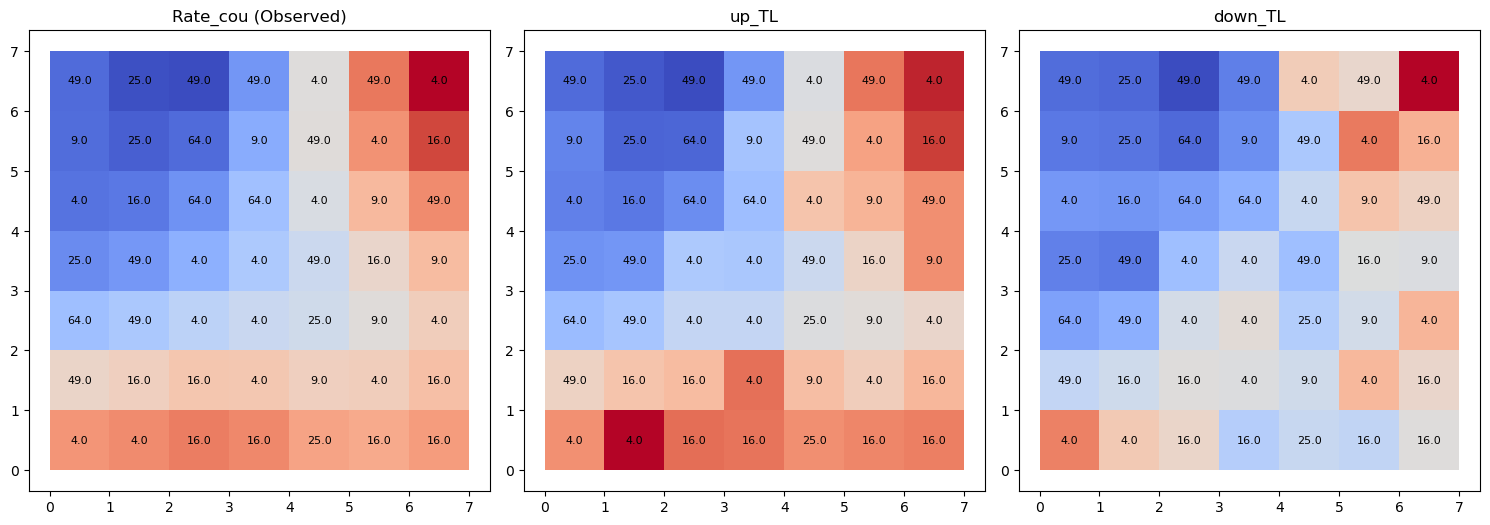

In [12]:
import matplotlib.pyplot as plt

# Create figure with 1 row and 3 columns for maps
fig, axs = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 1, 1]})

# --- First Map: Rate_cou ---
county_df.plot(column='Rate_cou', cmap='coolwarm', legend=False, ax=axs[0])
for idx, row in county_df.iterrows():
    # Calculate the centroid of the county geometry
    centroid = row.geometry.centroid
    # Annotate the plot with the census tract count (as text)
    axs[0].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[0].set_title("Rate_cou (Observed)")

# --- Second Map: down_AL ---
county_df.plot(column='up_TL', cmap='coolwarm', legend=False, ax=axs[1])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[1].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[1].set_title("up_TL")

# --- Third Map: down_AML ---
county_df.plot(column='down_TL', cmap='coolwarm', legend=False, ax=axs[2])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[2].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[2].set_title("down_TL")

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()


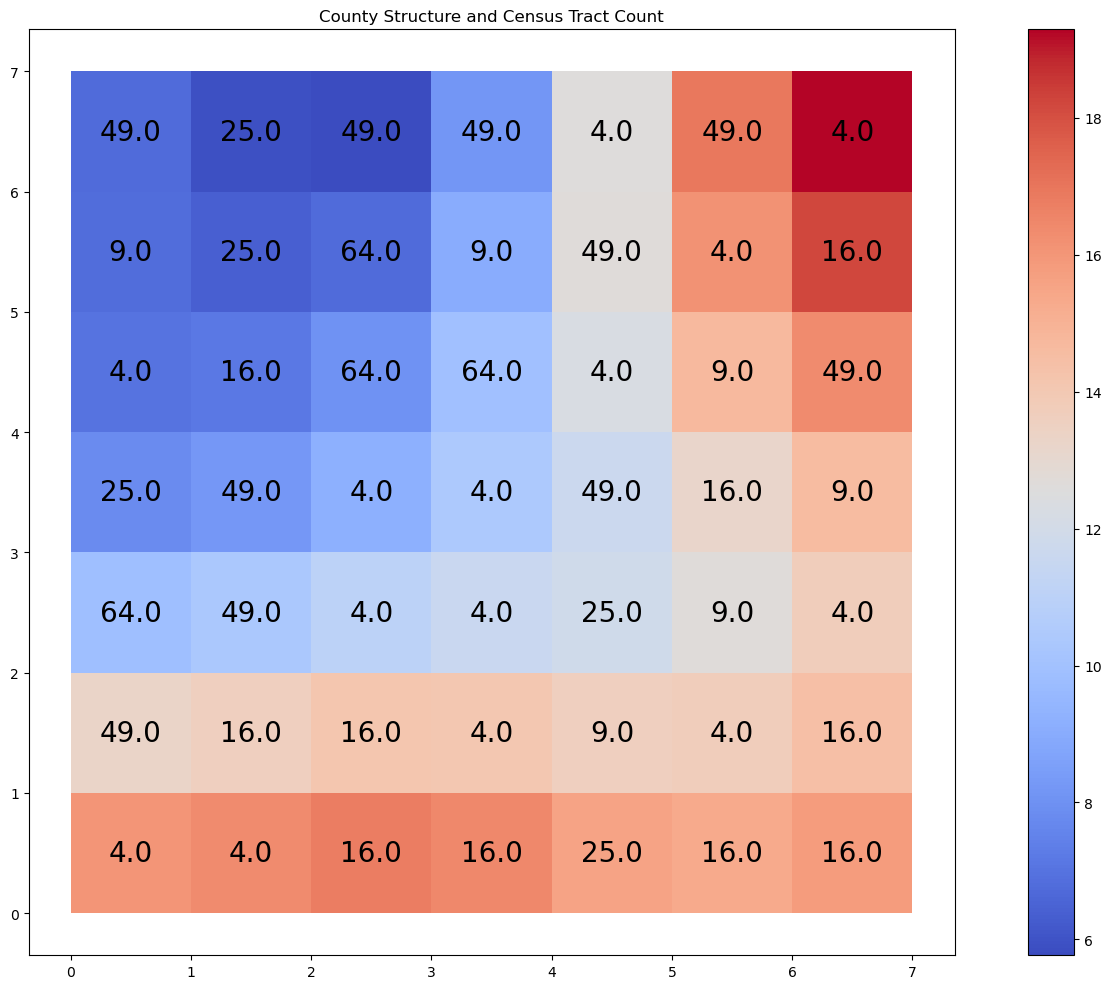

In [44]:
import matplotlib.pyplot as plt

# Create figure with 1 row and 3 columns for maps
fig, axs = plt.subplots(1, 1, figsize=(15, 10), gridspec_kw={'width_ratios': [1]})

# --- First Map: Rate_cou ---
county_df.plot(column='Rate_cou', cmap='coolwarm', legend=True, ax=axs)
for idx, row in county_df.iterrows():
    # Calculate the centroid of the county geometry
    centroid = row.geometry.centroid
    # Annotate the plot with the census tract count (as text)
    axs.annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20,
        color='black'
    )
axs.set_title("County Structure and Census Tract Count")


# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()


Bayesian computation

In [13]:
import pymc as pm
import arviz as az
import numpy as np

In [14]:
# get county rate to a numpy array
Y = county_df['Rate_cou'].to_numpy()

In [15]:
Y

array([16.05649763, 16.37180786, 16.78093152, 16.4736848 , 15.55268884,
       15.31813106, 15.84850912, 13.28163639, 13.63921365, 14.13901262,
       14.1082615 , 13.61365993, 13.73547431, 14.4491691 ,  9.88743859,
       10.31736117, 11.03994268, 11.57575689, 11.86050913, 12.63864798,
       13.72516298,  7.80908515,  8.22570359,  9.15821704, 10.40174635,
       11.65867693, 13.17344284, 14.59703977,  7.01854169,  7.17515192,
        8.02874904,  9.90211183, 12.31299752, 14.69689374, 16.38593091,
        6.77460115,  6.39392634,  6.77204021,  9.02687734, 12.67014033,
       16.13859106, 18.18524656,  6.76924894,  5.89643812,  5.76842026,
        8.14696112, 12.62355125, 16.92381872, 19.29252593])

In [16]:
vN_tda = county_df['down_TL'].to_numpy()

In [23]:
n_regions = len(Y)


# Expected number of cases per region (constant for simplicity)
E = np.full(n_regions, 30)

# Define the model

# Define the model
with pm.Model() as poisson_model_N:
    # Prior for random effect (Normal)
    vN_prior = pm.Normal("vN", mu=0.5, sigma=0.125, shape=n_regions)

    # Assuming you also have a spatial effect uN_prior (add it if it's missing)
    uN_prior = pm.Normal("uN", mu=0, sigma=1, shape=n_regions)  # Adjust parameters as needed

    # Define risk parameter
    thetaN = pm.Deterministic("thetaN", pm.math.exp(pm.math.log(E) + uN_prior + vN_prior))

    Y_obs_N = pm.Poisson("Y_obs_N", mu=thetaN, observed=Y)

    # Sample the model

    trace_N = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vN, uN]


/Users/h6x/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets"
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [24]:
thetaN_samples = trace_N.posterior["thetaN"]  # 
uN_samples = trace_N.posterior["uN"]  #

theraN_array = np.array(trace_N.posterior["thetaN"])  # Shape: (chains, samples, n_regions)
un_array = np.array(trace_N.posterior["uN"])  # Shape: (chains, samples, n_regions)

thetaN_mean = theraN_array.mean(axis=(0, 1))  # Average over chains & samples
uN_mean = un_array.mean(axis=(0, 1))  # Average over chains

# add the mean of the theta to the county_df
county_df['thetaN_mean'] = thetaN_mean
county_df['uN_mean'] = uN_mean

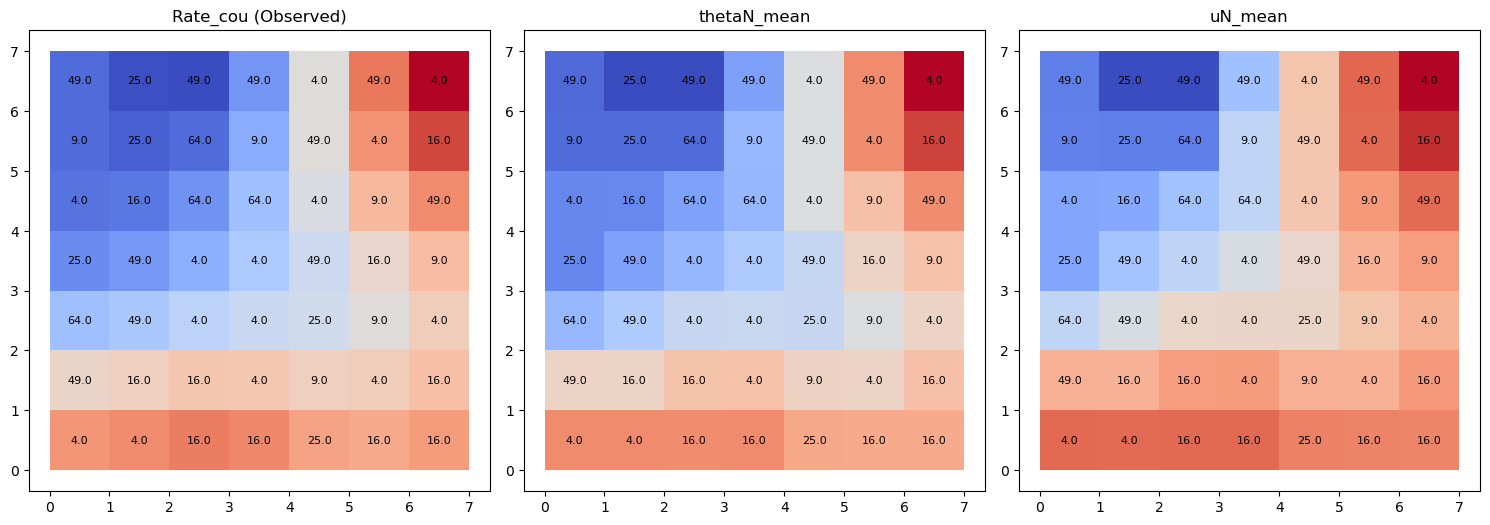

In [25]:
import matplotlib.pyplot as plt

# Create figure with 1 row and 3 columns for maps
fig, axs = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 1, 1]})

# --- First Map: Rate_cou ---
county_df.plot(column='Rate_cou', cmap='coolwarm', legend=False, ax=axs[0])
for idx, row in county_df.iterrows():
    # Calculate the centroid of the county geometry
    centroid = row.geometry.centroid
    # Annotate the plot with the census tract count (as text)
    axs[0].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[0].set_title("Rate_cou (Observed)")

# --- Second Map: down_AL ---
county_df.plot(column='thetaN_mean', cmap='coolwarm', legend=False, ax=axs[1])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[1].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[1].set_title("thetaN_mean")

# --- Third Map: down_AML ---
county_df.plot(column='uN_mean', cmap='coolwarm', legend=False, ax=axs[2])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[2].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[2].set_title("uN_mean")

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()